In [1]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [2]:
seed = 21

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [7]:
model = keras.Sequential()

Metal device set to: Apple M1


2021-12-13 19:52:11.927013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-13 19:52:11.927122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [9]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=256)

2021-12-13 19:52:12.823435: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/25


2021-12-13 19:52:13.082566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 1.7249 - accuracy: 0.3873

2021-12-13 19:52:33.808827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 22s 108ms/step - loss: 1.7249 - accuracy: 0.3873 - val_loss: 3.1297 - val_accuracy: 0.1647
Epoch 2/25
196/196 [==============================] - 19s 98ms/step - loss: 1.3035 - accuracy: 0.5382 - val_loss: 2.9974 - val_accuracy: 0.1554
Epoch 3/25
196/196 [==============================] - 19s 97ms/step - loss: 1.1007 - accuracy: 0.6143 - val_loss: 1.5515 - val_accuracy: 0.4641
Epoch 4/25
196/196 [==============================] - 19s 98ms/step - loss: 0.9776 - accuracy: 0.6596 - val_loss: 0.8580 - val_accuracy: 0.7005
Epoch 5/25
196/196 [==============================] - 20s 100ms/step - loss: 0.8937 - accuracy: 0.6887 - val_loss: 0.7916 - val_accuracy: 0.7228
Epoch 6/25
196/196 [==============================] - 20s 101ms/step - loss: 0.8269 - accuracy: 0.7139 - val_loss: 0.7260 - val_accuracy: 0.7489
Epoch 7/25
196/196 [==============================] - 20s 102ms/step - loss: 0.7770 - accuracy: 0.7332 - val_loss: 0.7242 - val_accuracy: 0.7535

In [10]:
model.evaluate(X_test, y_test, verbose=0)

[0.5673490762710571, 0.8110000491142273]

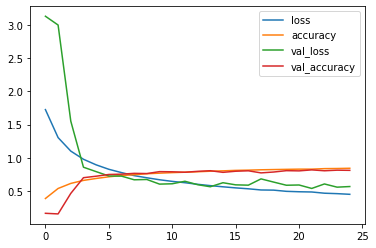

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()